<a href="https://colab.research.google.com/github/ds007kumar/Autonomous-Driving-Car/blob/master/FINICITY_PROJECT_I_mnist_dataset_using_mobilenet_with_tpot(AI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**MNIST Classification using Mobile net CNNs**

---


>Importing the Libraries



In [7]:
!pip install tpot


     |████████████████████████████████| 81kB 2.6MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 163kB 44.7MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=4e9a001951a6d28f5ff8b5b883d8734b14fab75913e907a6e7647f7b918beff6
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
train_data = mnist.train.images
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

In [0]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

x_train, x_test, y_train, y_test = train_test_split(digits.data,digits.target,train_size=0.75, test_size =0.25)

tpot = TPOTClassifier()
tpot.fit(x_train,y_train)




####################Using TPOT-20200226####################

In [0]:
import os
import struct
import sys

from array import array
from os import path
from PIL import Image

import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
%matplotlib inline

Mount Drive 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the MNIST Data Using Tensorflow Library**

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
train_data = mnist.train.images
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


**Visualization of Random Images**

16 Random images and their labels


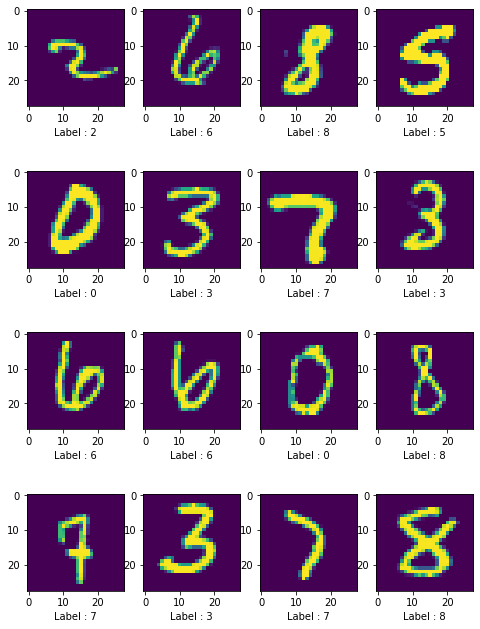

In [0]:
#Preview random image
fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(top=1.2)
col = 4
row = 4
print(str(col*row)+" Random images and their labels")
ri = random.sample(range(0,len(train_data)),col*row)
rii = 0
for i in range(1, col*row+1):
  img = np.copy(train_data[ri[rii]])
  img = img.reshape((28,28))
  img = np.asarray(img, dtype=np.float32)
  fig.add_subplot(row,col,i)
  x_label = 'Label : ' + str(train_labels[ri[rii]])
  plt.xlabel(x_label)
  plt.imshow(img, interpolation = 'nearest')
  rii = rii + 1
_ = plt.show()

****Using Mobilenet Model****


In [0]:
import csv
import math
import numpy as np
from PIL import Image

from tensorflow.keras import Model
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from tensorflow.keras.backend import epsilon

In [0]:
def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA, weights="imagenet") # Load pre-trained mobilenet
    # Do not include classification (top) layer

    # to freeze layers, except the new top layer, of course, which will be added below
    for layer in model.layers:
        layer.trainable = trainable

    # Add new top layer which is a conv layer of the same size as the previous layer so that only 4 coords of BBox can be output
    x = model.layers[-1].output
    x = Conv2D(4, kernel_size=4, name="coords")(x)
    # In the line above kernel size should be 3 for img size 96, 4 for img size 128, 5 for img size 160 etc.
    x = Reshape((4,))(x) # These are the 4 predicted coordinates of one BBox

    return Model(inputs=model.input, outputs=x)

In [0]:
train_data.shape

(55000, 784)

In [0]:
for file in x_train:
  print(train_data)

Streaming output truncated to the last 5000 lines.
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ..

In [0]:
# Logging predictions
tensors_to_log = {"probabilities" : "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(
  tensors = tensors_to_log, every_n_iter=500)

In [0]:
#Training
train_input_fn = tf.estimator.inputs.numpy_input_fn(
  x = {"x": train_data},
  y=train_labels,
	batch_size=128,
	num_epochs = 10,
	shuffle=True)
mnist_classifier.train(input_fn = train_input_fn, hooks = [logging_hook])

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.keras.layers.SeparableConv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for upda

In [0]:
#Eval
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
	x={"x":eval_data},
	y=eval_labels,
	num_epochs=1,
	shuffle=False)
eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)
print()
print("The accuracy on Test Dataset is : "+str(eval_results["accuracy"]*100) + "% and the loss is : " + str(eval_results["loss"]))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-02-19T13:09:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/mnist_mobilenet_convnet_modelpr/model.ckpt-4297
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-02-19-13:10:00
INFO:tensorflow:Saving dict for global step 4297: accuracy = 0.9692, global_step = 4297, loss = 0.09519181
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4297: /tmp/mnist_mobilenet_convnet_modelpr/model.ckpt-4297
{'accuracy': 0.9692, 'loss': 0.09519181, 'global_step': 4297}

The accuracy on Test Dataset is : 96.92000150680542% and the loss is : 0.09519181


16 Random images and their labels and predicted class
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/mnist_mobilenet_convnet_modelpr/model.ckpt-4297
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


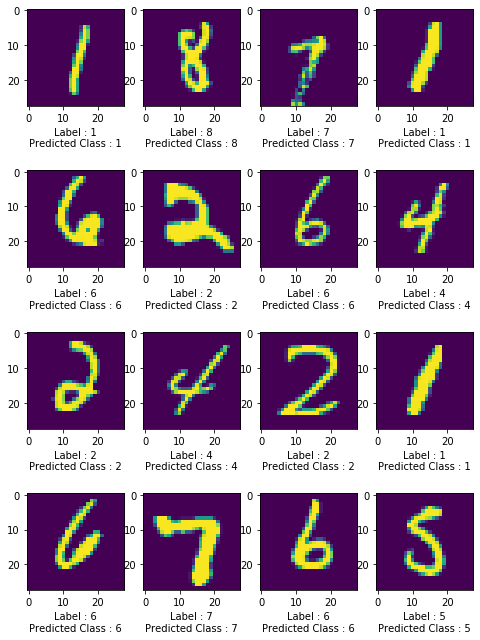

In [0]:
#Preview random image
fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(top=1.2)
col = 4
row = 4
print(str(col*row)+" Random images and their labels and predicted class")
#Generating random numbers, these numbers will be the indices of the images chosen
ri = random.sample(range(0,len(eval_data)),col*row)

#predict_x stores images chosen
predict_x = []
for i in ri:
  predict_x.append(np.array(eval_data[i],dtype=np.float32))

#Estimator to predict classes
predict_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x":np.array(predict_x,dtype=np.float32)},shuffle=False)
predictions = mnist_classifier.predict(input_fn = predict_input_fn)
#Storing the classes predicted
predicted_class = []
for pred_dict in predictions:
  predicted_class.append(pred_dict['classes'])

#Plotting
rii = 0
for i in range(1, col*row+1):
  img = np.copy(eval_data[ri[rii]])
  img = img.reshape((28,28))
  img = np.asarray(img, dtype=np.float32)
  fig.add_subplot(row,col,i)
  x_label = 'Label : ' + str(eval_labels[ri[rii]]) + "\n" + "Predicted Class : " + str(predicted_class[rii])
  plt.xlabel(x_label)
  plt.imshow(img, interpolation = 'nearest')
  rii = rii + 1
_ = plt.show()